### Lab8  
To assemble the reads into a whole genome, execute following command line in the terminal:  

**~$ spades -1 illumina_reads_R1.fastq -2 illumina_reads_R2.fastq --pacbio pacbio_reads.fastq --o Ethan/Lab8 -t 1**

Because this process could take a long time to run, a screen is used for keeping it running in background. Before I close the window, the screen that is running the above command is detached through: 'Ctrl' + 'A', 'D'.  
The number for my screen is: 9583.pts-262.meowth.  
To resume to this screen, I can use the command:  

**~$ screen -r 9583.pts-262.meowth**


### Lab9  
#### Generate assembly statistics
First, using the assembly-stats program to calculate statistics on both 'contigs.fasta' and 'scaffolds.fasta' and the results are shown as follows:
> ~$ assembly-stats Ethan/Lab8/contigs.fasta  
stats for Ethan/Lab8/contigs.fasta  
sum = 6678635, n = 176, ave = 37946.79, largest = 414008  
N50 = 234690, n = 11  
N60 = 202142, n = 14  
N70 = 154232, n = 18  
N80 = 103367, n = 23  
N90 = 81286, n = 30  
N100 = 128, n = 176  
N_count = 0  
Gaps = 0   

>~$ assembly-stats Ethan/Lab8/scaffolds.fasta  
stats for Ethan/Lab8/scaffolds.fasta  
sum = 6678655, n = 174, ave = 38383.07, largest = 414008  
N50 = 234690, n = 11  
N60 = 202142, n = 14  
N70 = 154232, n = 18  
N80 = 103367, n = 23  
N90 = 81821, n = 30  
N100 = 128, n = 174  
N_count = 20  
Gaps = 2  

The total length of 'contigs.fasta' is 6678635 and the sequence number is 176. N50 is 234690.  

The total length of 'scaffolds.fasta' is 6678655 and the sequence number is 174. N50 is 234690.   

#### Questions
**Why is N50 is useful statistic to calculate? Why not just list the mean or median contig length?
In your assembly, are scaffolds longer than contigs, or are scaffolds approximately equal to
contigs?**  
The N50 is defined as the minimum contig length needed to cover 50% of the genome. N50 is a measure to describe the quality of assembled genomes that are fragmented in contigs of different length. N50 is not simply the median over all contigs lengths, but a length weighted median that gives a more robust quality value than a simple median. In my assembly, scaffolds are a little bit longer than contigs but that can be seens as approximately equal, for the process of assembling contigs into scaffolds only merges 2 sequences, from 176 to 174.

#### Extra Credit

In [75]:
data = open('Lab9_data/output')
data_read = data.readlines()
print(data_read[1])

NODE_4_length_332509_cov_9.114046	rna_hmm3	rRNA	133603	136507	0	-	NA	23S_rRNA



In [29]:
rRNA = []
for i in data_read:
    if '16S_rRNA' in i:
        rRNA.append(i)
newdata = open('Lab9_data/16_rRNA','w')
newdata.write(data_read[0])
for i in rRNA:
    newdata.write(i)
newdata.close()

In [57]:
coverage = []
for i in data1:
    if 'cov_' in i:
        temp = i.split('\t')
        for j in temp:
            temp1 = j.split('_')
            coverage.append(float(temp1[5].strip()))
len(coverage)

176

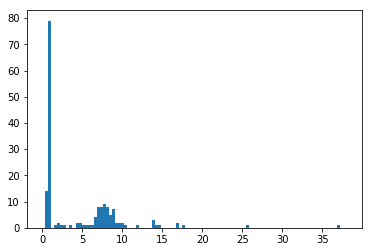

In [74]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

plt.hist(x = coverage, range = (0,38), bins = 100)
plt.show()

#### Questions
**Is coverage uniformly distributed? Does it look Gaussian? Is it bimodal or trimodal? What explains the presence of contigs with coverage an integer multiple of the mean coverage?**

The coverage is not uniformly distributed and it does not look Gaussian. It is bimodal. It does not explain too much, from my perspective, this could be a coincidence and suggest that the dispersity of the samples is pretty large.

#### Identify the taxon from which your genome originated

First, run the rna_hmm3.py program to locate rRNA genes in the assembled contigs. 

**~$ rna_hmm3.py -i Ethan/Lab8/contigs.fasta -o Ethan/Lab8/Lab9_data/output**

Then, to get the nucleic sequences of the 16S rRNA genes, run the 'bedtools getfasta' command.

In [32]:
! bedtools getfasta -fi contigs.fasta -bed Lab9_data/16_rRNA

>NODE_23_length_103367_cov_10.081286:35530-37075
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGG

After uploading the 16S sequences into the Ribosomal Database Project’s SeqMatch tool, I get the same result for those 4 sequences.  
>domain Bacteria  (1)   
phylum "Proteobacteria"  (1)   
class Gammaproteobacteria  (1)   
order Pseudomonadales  (1)   
family Pseudomonadaceae  (1)   
genus Pseudomonas  (1)   

Because of limited time issue, I then use only BASys platform to annotate the 'contigs.fasta' genome. And the mapping result is shown as follows.

![](https://i.imgur.com/M69653h.png) ![](https://i.imgur.com/Nl420rI.png)

### Research and write-up

According to the result generated by Ribosomal Database Project’s SeqMatch tool, we know that the genus which this genome comes from is Pseudomonas.

The annotation from BASYs shows that there are 444 gene identified and annotated in the *contigs.fasta* file. According to the map and legend generated with the anntation, genes first can be categorized as encoding proteins or functional RNA. Then, in the category of proteins, the function of genes could be further divided into information storage and processing, cellular process and metabolism.

According to Wikipedia, psedumonas is a genus of Gammaproteobacteria and containing 191 validly described species. Based on the informaiton provided by SeqMatch tool and annotation by BASYs, we are going to talk about the topics as follows.

1. **What environment do relatives of your bacterium live in? Is there evidence of adaptation to this environment in the genome?**  

Pseudomonas bacteria can be found in many different environments like soil, water and even plant and animal tissue[[2]]. To my best knowledge, there are several annotations indicating that this Pseudomonas could be a specific species acting as a human pathogen, probably Pseudomonas aeruginosa. I come to this conclusion because *BASYS00118 Mulitidrug resistance protein pmpM [H]*, *BASYS00244 Multiple antibiotic resistance protein marR [H]*, *BASYS00247 Mulitidrug resistance protein A [H]*, *BASYS00249 Mulitidrug resistance protein B [H]*, *BASYS00400 Probable multidrug resistance protein yoeA [H]* are found in the annotation table. The occurrence of those proteins are all through the adaptation process of Pseudomonas aeruginosa to human immune system.  

Hence, it is believed that this bacterium is a kind of human pathogen and could invade human body with the ability to prevent being eliminated from some drugs and antibiotics. The discovery of several genes that express proteins for resistance to multidrugs and antibiotics is one of the indicators for it. 



2. **Does your genome encode any known antibiotic resistance genes? Do you expect it to be susceptible to penicillin, tetracycline, or chloramphenicol?**   

According to the annotation, gene *BASYS00244* is the *marR [H]* gene, which is responsible for encoding *Multiple antibiotic resistance protien marR [H]*. One such multiresistance system, designated Mar (multiple antibiotic resistance), was initially discovered by selection of Escherichia coli resistant to low levels of tetracycline or chloramphenicol[[1]]. These mutants showed decreased susceptibility to the selective agent as well as to many other structurally unrelated antimicrobial agents. Northern (RNA blot) analysis of mRNA from Mar mutant strain revealed increased transcription of a 1.4-kb mRNA in the Mar mutants. This transcript also showed inducibility upon growth of the cultures in tetracycline- or chloramphenicol containing medium.

Therefore, it is believed that this Pseudomonas genome includes antibiotic resistance genes and is expected to be susceptible to tetracycline or chloramphenicol.

  
[1]:https://www.ncbi.nlm.nih.gov/pubmed/8383113?dopt=Abstract
[2]:https://en.wikipedia.org/wiki/Pseudomonas

1 https://www.ncbi.nlm.nih.gov/pubmed/8383113?dopt=Abstract  
2 https://en.wikipedia.org/wiki/Pseudomonas